In [5]:
#lib needed
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import detect_face
import detect_human_skin
import hr_kernel

In [6]:
# get all image folder
path = "./img/"
dirs = os.listdir(path)
image_paths = []
for directory in dirs:
    image_path = path + directory + '/'
    image_paths.append(image_path)

# for now get all image in fisrt folder
img_arr = []
fileReg = image_paths[0] + '*jpg'
images = glob.glob(fileReg)
img_arr.append(images)



In [18]:
#read out image to know the size
cur_img = cv2.imread(img_arr[0][0])
size = cur_img.shape[1], cur_img.shape[0]
video_output = './' + directory + '_video_out.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
print(video_output)
vid = cv2.VideoWriter(video_output,fourcc,30,size)
#first image
# cur_path = img_arr[0][0]
# cur_img = cv2.imread(cur_path)
# plt.imshow(cur_img)
# plt.show()

./HeartRate_2_video_out.mp4


In [26]:
#testing out our kernel
seq_arr_bgr = []
seq_arr_hsv = []
diff_arr = []
img_arr_seq = img_arr[0]
img_len = len(img_arr_seq)
countUp = 0
curPer = 0
print(img_len)
for img in img_arr_seq:
    cur_img = cv2.imread(img)
    seq_arr_bgr, seq_arr_hsv, img_out = hr_kernel.kernel(cur_img,seq_arr_bgr,seq_arr_hsv)
    vid.write(img_out)
    countUp = countUp +1
    percent = int((countUp/img_len)*100)
    if percent%10 == 0:
        if curPer != percent:
            print(percent)
            curPer = percent        
vid.release()
print('done')

646
10
20
30
40
50
60
70
80
90
100
done


In [31]:
np_seq_arr_bgr = np.array(seq_arr_bgr)
np_seq_arr_hsv = np.array(seq_arr_hsv)
print(len(seq_arr_bgr[0]))
a = np_seq_arr_hsv[0][2].shape
print(a)

2


IndexError: index 2 is out of bounds for axis 0 with size 2

In [27]:
# # initialize numpy array for every value


y_arr = []
for i in range(0,6):
    y_arr.append([])

# print(len(y_arr))

for cur_arr in seq_arr_hsv:
    for row, mm_arr in enumerate(cur_arr):
        for col, comp_item in enumerate(mm_arr):
            index = row*len(mm_arr) + col
            curValue = comp_item
            y_arr[index].append(curValue)
#             print(index)
#             if len(y_arr[index]) == 0:
#                 y_arr[index].append(0)
#             else:
#                 diff = curValue - y_arr[index][-1]
#                 y_arr[index].append(diff)
print('done')    

done


In [21]:
y_arr_np = np.array(y_arr)

In [22]:
print(y_arr_np.shape[1])

646


C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


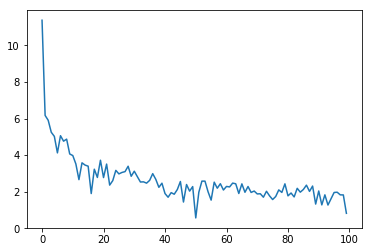

In [30]:
import scipy.fftpack


# Number of samplepoints
N = y_arr_np.shape[1]

# sample spacing
T = 1.0 / 30
xf =np.arange(N)
yf = np.log(scipy.fftpack.fft(y_arr_np[1]))
fig, ax = plt.subplots()
ax.plot(xf[0:100], yf[0:100])
plt.show()

C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


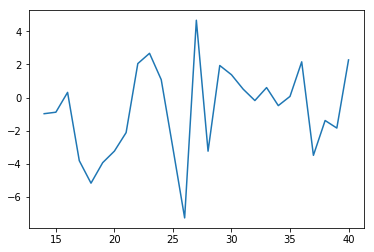

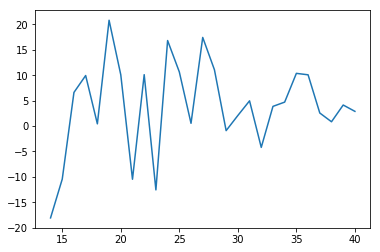

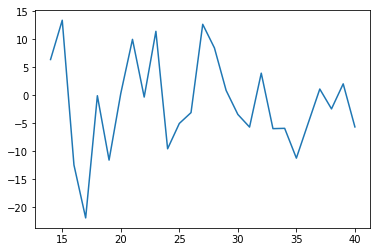

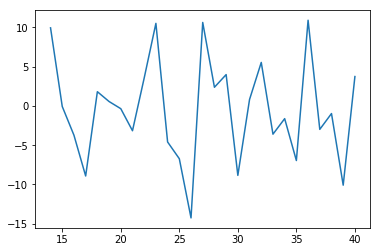

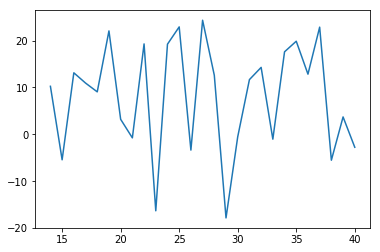

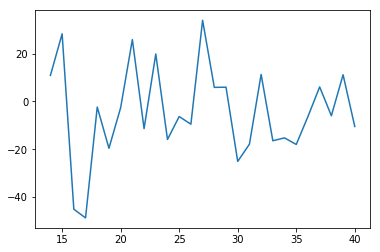

In [31]:
import scipy.fftpack


# Number of samplepoints
N = y_arr_np.shape[1]

# sample spacing
T = 1.0 / 30
xf =np.arange(N)
for idx in range(0,y_arr_np.shape[0]):
    yf = scipy.fftpack.fft(y_arr_np[idx])
    fig, ax = plt.subplots()
    ax.plot(xf[14:41], yf[14:41])
    plt.show()
# ax.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))


C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


ValueError: x and y must have same first dimension, but have shapes (138,) and (276,)

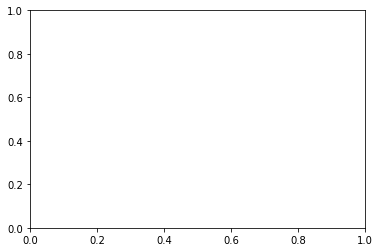

In [10]:
import scipy.fftpack


# Number of samplepoints
N = y_arr_np.shape[1]

# sample spacing
T = 1.0 / 30
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
yf = scipy.fftpack.fft(y_arr_np[0])
fig, ax = plt.subplots()
ax.plot(xf, yf)
plt.show()

In [14]:
import scipy.fftpack


# Number of samplepoints
N = y_arr_np.shape[1]

# sample spacing
T = 1.0 / 30
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
for idx in range(0,y_arr_np.shape[0]):
    yf = scipy.fftpack.fft(y_arr_np[idx])
    fig, ax = plt.subplots()
    ax.plot(xf[36:105], yf[36:105])
    plt.show()
# ax.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
# #take only 20 second
# fps = 30
# # num = int(20*29.997)
# mean_arr_np_sh = mean_arr_np[0:num]

# Number of samplepoints
N = median_arr_np.shape[0]

# sample spacing
T = 1.0 / 30
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(median_arr_np)
yf_pos = np.log(2.0/N * np.abs(yf[:N//2]))

fig, ax = plt.subplots()
# ax.plot(xf, yf_pos)
ax.plot(xf[14:41], yf_pos[14:41])
plt.show()

NameError: name 'median_arr_np' is not defined

In [48]:
a = np.argmax(yf_pos[0:50])
print(a)
b = xf[a]
print(b)
bpm = b*60
print(bpm)

49
2.71217712177
162.730627306


In [14]:
a = np.arange(3)
print(a)
print(xf.shape,yf.shape)

[0 1 2]
(453,) (453,)


C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


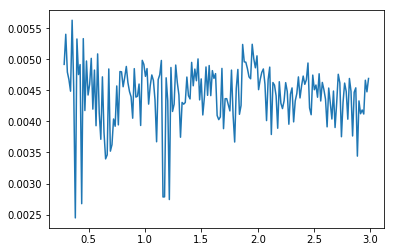

In [25]:
import scipy.fftpack


# Number of samplepoints
N = y_arr_np[0].shape[0]

# sample spacing
T = 1.0 / 30

# x = np.linspace(0.0, N*T, N)
yf = np.log(scipy.fftpack.fft(y_arr_np[0]))
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
# xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf[20:N//10], 2.0/N * np.abs(yf[20:N//10]))
# ax.plot(xf, yf)
plt.show()

In [27]:
newY = 2.0/N * np.abs(yf[20:N//10])
a = np.argmax(newY)
print(a)
b = xf[20+a]
print(b)

5
0.353440150801


In [65]:
print(N*T)
bpm = (b*(3))
print(bpm)

18.166666666666668
66


In [12]:
mean_arr = []
median_arr = []
pre_mean = -1
pre_median = -1

for cur_val in seq_arr:
    cur_mean = cur_val['rgb_img'][1][0]
    cur_median = cur_val['rgb_img'][1][1]
    if pre_mean != -1:
        mean_arr.append(cur_mean-pre_mean)
        median_arr.append(cur_median-pre_median)
        
    pre_mean = cur_mean
    pre_median = cur_median

print('done')
median_arr_np = np.array(median_arr)
mean_arr_np = np.array(mean_arr)

done


C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


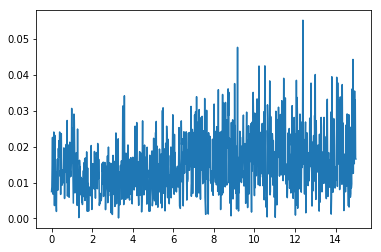

In [13]:
import scipy.fftpack
# Number of samplepoints
N = median_arr_np.shape[0]
# sample spacing
T = 1.0 / 29.997
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(median_arr_np)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [6]:
mean_arr = []
median_arr = []

for cur_val in seq_arr:
    mean_arr.append(cur_val['hls_img'][0][0])
    median_arr.append(cur_val['hls_img'][0][1])

median_arr_np = np.array(median_arr)
mean_arr_np = np.array(mean_arr)

C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\Deemarc\AppData\Local\Continuum\miniconda3\envs\carnd-term1\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


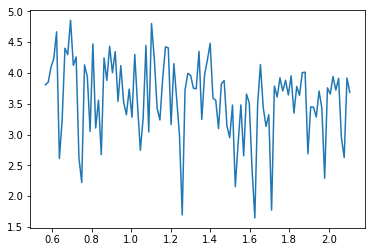

In [10]:
import scipy.fftpack
# Number of samplepoints
N = median_arr_np.shape[0]
# sample spacing
T = 1.0 / 29.997
x = np.linspace(0.0, N*T, N)
yf = np.log(scipy.fftpack.fft(median_arr_np))
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.plot(xf[40:150], yf[40:150])
plt.show()

In [58]:
ans = 18*30
print(ans)

540
